# Applied Data Science Capstone By IBM / Coursera
## IBM : Capstone Project : Battle of Neighbourhood : Part 1 & Part 2
### *Opening a Restaurant in Ahmedabad, Gujarat, Indai* 
#####     - by Jogi Goghari, July 2020

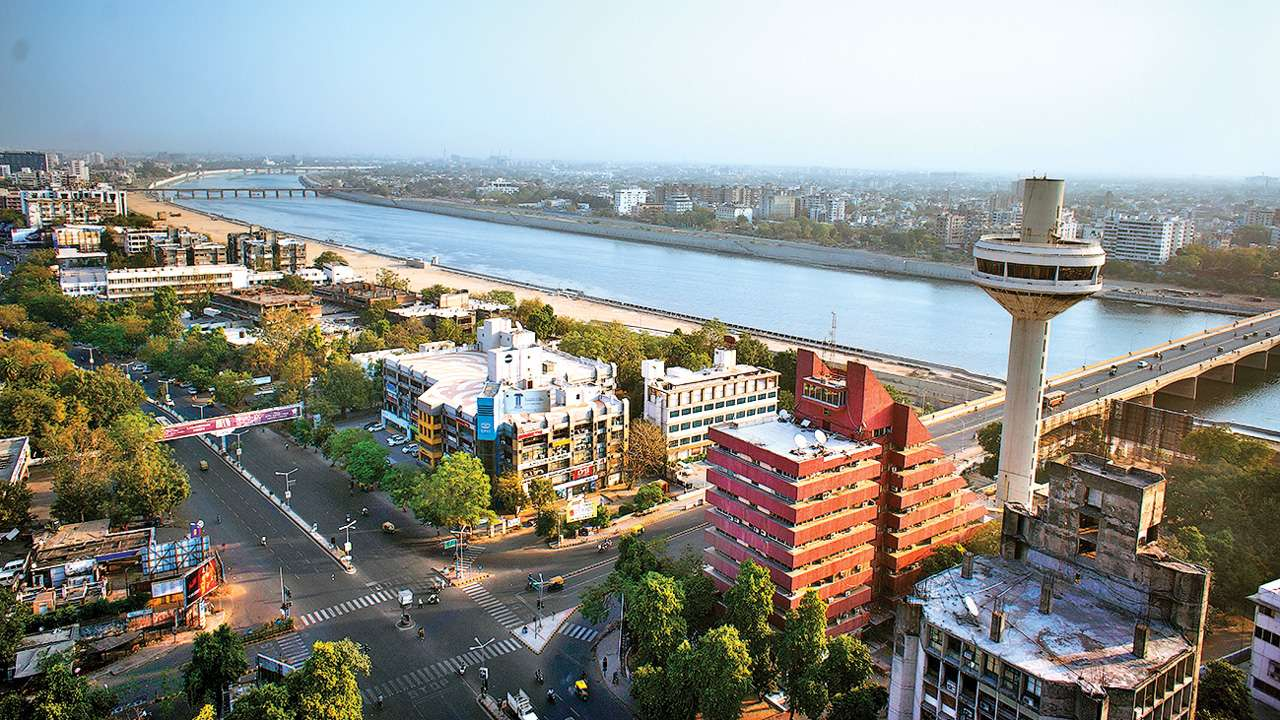

* ### Table of contents:
1. Introduction 
2. Problem Description : Business Problem
3. Targeted Audience 
4. Data Requirement & Sources


### 1. Introduction

<b>Ahmedabad</b> is the city of peace loving people, it is one of the metro city of India and more addition it is economic capital of Gujarat state. Ahmedabad is also name as one of the Heritage city of India.<br> 
<br>
The official language of Ahmedabad  and the one that is most widely spoken is Gujarati. However, Hindi and English are also spoken as a formal language within businesses and government agencies. Over last decades it is continuously grow because of the city’s important role in government and commercial business.<br>
<br>
With its diverse culture, comes diverse food items. There are many restaurants in New Delhi City, each belonging to different categories like Gujarati, Panjabi, South Indian ,Chinese , Italian , French etc.
 So as part of this project , we will list and visualise all major parts of Ahmedabad City .


### 2. Problem Description:
The $Objective$ of the project is <u>to Explore and Analyse the neighbourhood for restaurants and to select best location in the Ahmedabad city related to open a new restaurant.</u> <br>
<br>
A **Restaurant** is a business which prepares and serves food and drink to customers in return for money, either paid before the meal, after the meal, or with an open account. The Ahmedabad City is famous for its excellent cuisine. It’s food culture includes an array of individual states of India as well as some international cuisines.<br>
<br>
1: Ahmedabad City Population<br> 
2: Ahmedabad City Demographics<br> 
3: Are there any Farmers Markets, Wholesale markets etc nearby so that the ingredients can be purchased fresh to maintain quality and cost?<br> 
4: Are there any venues like Gyms, Entertainment zones, Parks etc.  nearby where floating population is high etc.<br>
5: Who are the competitors in that location?<br> 
6: Cuisine served / Menu of the competitors<br> 
7: Segmentation of the Borough<br> 
8: Untapped Markets<br>
9: Saturated markets<br>
etc...<br>
The list can go on...

### 3. Targeted Audience:
Ahmedabad is a city were <u>55. 7 Lakh</u> people are living. Concern of this project will be going to target interested people form the city who are willing or wanted to start restaurant project in the Ahmedabad City area. This will also going to help current restaurant owners to how to perform Post COVID-19 condition. Like as home delivery pickup condition.    


### 4. Data Requirement & Sources:  
#### 4.1 Required data:
1. *List of neighbourhoods in the Ahmedabad City*. Witch will help us to give scope of the areas for restaurants.<br>
2. *Latitude and  Longitudes of the extracted neighbourhoods data*. This will act as the input parameters to the **FOURSQUARE  API** to explore a neighbourhoods.<br>
3. Cluster on neighbourhoods depending on the frequency of given radius of a particular data.

#### 4.2 Sources and methods to get the data:
1. List of neighbourhoods in the Ahmedabad City.<br>
   Source : https://www.kaggle.com/rabhar/data <br>
   We are extracting Kaggle zometo Ahmedabad Restaurant data<br>    
2. We  will then get the Latitude and Longitude of each neighborhood using geocoder library  and attach these coordinates to our neighborhood data <br>
3. Then with the help of Foursquare api calls we eil send the coordinates of each neighbourhoods and get venues details of restaurants<br> 

This project will be completed with the help of below skills and methods:
- Data science skills, 
- Data cleaning, 
- Exploring, 
- Analyzing, 
- Visualizing using folium maps in particular.<br> 

More adding in this using **Geocoder library** to get the *latitude and longitudes* for neighborhoods.  We will also take help from **Foursquare API** to get the Resturans details which are near to each neighborhood.<br>

And finally using a Machine learning technique **'K-means clustering'** to *cluster* resturants into different categories.

***

### Part 1 & 2 : Preprocessing a real world data set from Kaggle showing the Restaurants of Ahmedabad City

##### 1.   Import necessary libraries

In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#### 1.  Now We will add our downloaded Kaggel File in to this notebook

In [29]:
df = pd.read_csv('zomato_restaurants_in_India.csv')

In [30]:
df.head(2)

,res_id,name,establishment,url,address,city,city_id,locality,latitude,longitude,...,price_range,currency,highlights,aggregate_rating,rating_text,votes,photo_count,opentable_support,delivery,takeaway
0,3400299,Bikanervala,['Quick Bites'],https://www.zomato.com/agra/bikanervala-khanda...,"Kalyani Point, Near Tulsi Cinema, Bypass Road,...",Agra,34,Khandari,27.211450,78.002381,...,2,Rs.,"['Lunch', 'Takeaway Available', 'Credit Card',...",4.4,Very Good,814,154,0.0,-1,-1
1,3400005,Mama Chicken Mama Franky House,['Quick Bites'],https://www.zomato.com/agra/mama-chicken-mama-...,"Main Market, Sadar Bazaar, Agra Cantt, Agra",Agra,34,Agra Cantt,27.160569,78.011583,...,2,Rs.,"['Delivery', 'No Alcohol Available', 'Dinner',...",4.4,Very Good,1203,161,0.0,-1,-1


In [31]:
df.shape  #size

(211944, 26)

#### 2. Identifing name of Columns and its type

In [32]:
df.dtypes

res_id                    int64
name                     object
establishment            object
url                      object
address                  object
city                     object
city_id                   int64
locality                 object
latitude                float64
longitude               float64
zipcode                  object
country_id                int64
locality_verbose         object
cuisines                 object
timings                  object
average_cost_for_two      int64
price_range               int64
currency                 object
highlights               object
aggregate_rating        float64
rating_text              object
votes                     int64
photo_count               int64
opentable_support       float64
delivery                  int64
takeaway                  int64
dtype: object

### 3. Filtering only Ahmedabad City from column 'City' 

In [33]:
# Taking only the Ahmedabad in city colum and dropping the rest of the cities 
df.drop(df.index[df['city'] != 'Ahmedabad'], inplace = True)
df.head(2)

,res_id,name,establishment,url,address,city,city_id,locality,latitude,longitude,...,price_range,currency,highlights,aggregate_rating,rating_text,votes,photo_count,opentable_support,delivery,takeaway
2622,18757684,Ph Se Food,['Casual Dining'],https://www.zomato.com/ahmedabad/ph-se-food-bo...,"205-206, Silve Radiance, Sindhu Bhawan Road, P...",Ahmedabad,11,Bodakdev,23.038755,72.510887,...,3,Rs.,"['Dinner', 'Cash', 'Takeaway Available', 'Cred...",4.5,Excellent,1434,773,0.0,-1,-1
2623,18658177,Millhouse,['Casual Dining'],https://www.zomato.com/ahmedabad/millhouse-1-v...,"3rd Floor, Alpha One Mall, Vastrapur, Ahmedabad",Ahmedabad,11,"Ahmedabad One Mall, Vastrapur",23.039770,72.531508,...,3,Rs.,"['No Alcohol Available', 'Debit Card', 'Credit...",4.5,Excellent,1530,768,0.0,-1,-1


In [34]:
df.shape

(3162, 26)

### 4. Reseting index from 0  

In [35]:
# Reset the index and dropping the previous index
df = df.reset_index(drop=True)
df.head(2)

,res_id,name,establishment,url,address,city,city_id,locality,latitude,longitude,...,price_range,currency,highlights,aggregate_rating,rating_text,votes,photo_count,opentable_support,delivery,takeaway
0,18757684,Ph Se Food,['Casual Dining'],https://www.zomato.com/ahmedabad/ph-se-food-bo...,"205-206, Silve Radiance, Sindhu Bhawan Road, P...",Ahmedabad,11,Bodakdev,23.038755,72.510887,...,3,Rs.,"['Dinner', 'Cash', 'Takeaway Available', 'Cred...",4.5,Excellent,1434,773,0.0,-1,-1
1,18658177,Millhouse,['Casual Dining'],https://www.zomato.com/ahmedabad/millhouse-1-v...,"3rd Floor, Alpha One Mall, Vastrapur, Ahmedabad",Ahmedabad,11,"Ahmedabad One Mall, Vastrapur",23.039770,72.531508,...,3,Rs.,"['No Alcohol Available', 'Debit Card', 'Credit...",4.5,Excellent,1530,768,0.0,-1,-1


### 5. Removing Not related Columns and extra Details from DataFrame  

In [36]:
df1 =df.drop(['url','city','zipcode','city_id','country_id','timings','average_cost_for_two','price_range','currency','highlights','rating_text','photo_count','opentable_support','delivery','takeaway'], axis=1)
#df1 =df.drop(['delivery'], axis=1)
df1.head(2)                          

,res_id,name,establishment,address,locality,latitude,longitude,locality_verbose,cuisines,aggregate_rating,votes
0,18757684,Ph Se Food,['Casual Dining'],"205-206, Silve Radiance, Sindhu Bhawan Road, P...",Bodakdev,23.038755,72.510887,"Bodakdev, Ahmedabad","North Indian, Chinese, Fast Food",4.5,1434
1,18658177,Millhouse,['Casual Dining'],"3rd Floor, Alpha One Mall, Vastrapur, Ahmedabad","Ahmedabad One Mall, Vastrapur",23.039770,72.531508,"Ahmedabad One Mall, Vastrapur, Ahmedabad","Continental, Italian",4.5,1530


In [37]:
df1.shape

(3162, 11)

#### 5.1  Now we are removing DUPLICATE Values or name or ID from Table 

In [38]:
df2 = df1.drop_duplicates()
df2

,res_id,name,establishment,address,locality,latitude,longitude,locality_verbose,cuisines,aggregate_rating,votes
0,18757684,Ph Se Food,['Casual Dining'],"205-206, Silve Radiance, Sindhu Bhawan Road, P...",Bodakdev,23.038755,72.510887,"Bodakdev, Ahmedabad","North Indian, Chinese, Fast Food",4.5,1434
1,18658177,Millhouse,['Casual Dining'],"3rd Floor, Alpha One Mall, Vastrapur, Ahmedabad","Ahmedabad One Mall, Vastrapur",23.039770,72.531508,"Ahmedabad One Mall, Vastrapur, Ahmedabad","Continental, Italian",4.5,1530
2,18663856,The Red Bistro,['Casual Dining'],"Armeida, Sindhu Bhavan Road, Off SG Road, Boda...",Bodakdev,23.039852,72.509181,"Bodakdev, Ahmedabad","Mexican, Italian, North Indian",4.6,695
3,18819827,Kadak Bhagat,['Casual Dining'],"1, First Floor, Dev Aurum Complex, Deer Cirle,...",Prahlad Nagar,23.012411,72.514392,"Prahlad Nagar, Ahmedabad","North Indian, Chinese, Fast Food",4.4,977
4,18718880,Urban Khichdi,['Casual Dining'],"A -103, Shivalik Plaza, Opposite AMA, IIM Road...",Vastrapur,23.028315,72.542458,"Vastrapur, Ahmedabad","North Indian, Continental",4.7,619
...,...,...,...,...,...,...,...,...,...,...,...
3129,18755573,Dhadoom,['Quick Bites'],"Ground Floor 18, Galaxy Line, Near Silicon Tow...",C G Road,23.028203,72.559139,"C G Road, Ahmedabad",Fast Food,3.6,111
3137,110332,Rasranjan,['Quick Bites'],"Rasranjan House, Vijay Cross Road, Navrangpura...",Navrangpura,23.041432,72.548670,"Navrangpura, Ahmedabad","Mithai, Street Food",3.6,307
3146,113708,Nanjing,['Casual Dining'],"Shop 302 - 303, CG Square Mall, Near Associate...","CG Square Mall, C G Road",23.024242,72.556511,"CG Square Mall, C G Road, Ahmedabad","Chinese, Asian",4.3,522
3148,112841,Crazy Noodles,['Casual Dining'],"7, Camps Corner 2, Opposite Auda Garden, 100 F...","Camps Corner 2, Prahlad Nagar",23.011511,72.507243,"Camps Corner 2, Prahlad Nagar, Ahmedabad",Chinese,4.2,532


In [39]:
df2.shape

(1247, 11)

In [15]:
#df2[['Ahmedabad City Area','City name']] = df.Name.str.split(",",expand=True,)

#### 5.2 Now we are droping 0 rating rows or Resturants from the table 

In [40]:
df2.drop(df2[df2['aggregate_rating'] <= 0].index ,inplace = True)
df2
#df.drop(df[df['Age'] < 25].index, inplace = True)

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,res_id,name,establishment,address,locality,latitude,longitude,locality_verbose,cuisines,aggregate_rating,votes
0,18757684,Ph Se Food,['Casual Dining'],"205-206, Silve Radiance, Sindhu Bhawan Road, P...",Bodakdev,23.038755,72.510887,"Bodakdev, Ahmedabad","North Indian, Chinese, Fast Food",4.5,1434
1,18658177,Millhouse,['Casual Dining'],"3rd Floor, Alpha One Mall, Vastrapur, Ahmedabad","Ahmedabad One Mall, Vastrapur",23.039770,72.531508,"Ahmedabad One Mall, Vastrapur, Ahmedabad","Continental, Italian",4.5,1530
2,18663856,The Red Bistro,['Casual Dining'],"Armeida, Sindhu Bhavan Road, Off SG Road, Boda...",Bodakdev,23.039852,72.509181,"Bodakdev, Ahmedabad","Mexican, Italian, North Indian",4.6,695
3,18819827,Kadak Bhagat,['Casual Dining'],"1, First Floor, Dev Aurum Complex, Deer Cirle,...",Prahlad Nagar,23.012411,72.514392,"Prahlad Nagar, Ahmedabad","North Indian, Chinese, Fast Food",4.4,977
4,18718880,Urban Khichdi,['Casual Dining'],"A -103, Shivalik Plaza, Opposite AMA, IIM Road...",Vastrapur,23.028315,72.542458,"Vastrapur, Ahmedabad","North Indian, Continental",4.7,619
...,...,...,...,...,...,...,...,...,...,...,...
3129,18755573,Dhadoom,['Quick Bites'],"Ground Floor 18, Galaxy Line, Near Silicon Tow...",C G Road,23.028203,72.559139,"C G Road, Ahmedabad",Fast Food,3.6,111
3137,110332,Rasranjan,['Quick Bites'],"Rasranjan House, Vijay Cross Road, Navrangpura...",Navrangpura,23.041432,72.548670,"Navrangpura, Ahmedabad","Mithai, Street Food",3.6,307
3146,113708,Nanjing,['Casual Dining'],"Shop 302 - 303, CG Square Mall, Near Associate...","CG Square Mall, C G Road",23.024242,72.556511,"CG Square Mall, C G Road, Ahmedabad","Chinese, Asian",4.3,522
3148,112841,Crazy Noodles,['Casual Dining'],"7, Camps Corner 2, Opposite Auda Garden, 100 F...","Camps Corner 2, Prahlad Nagar",23.011511,72.507243,"Camps Corner 2, Prahlad Nagar, Ahmedabad",Chinese,4.2,532


In [41]:
df2.shape

(1078, 11)

### 6. Changing Title of Columns 

In [42]:
df2.columns=['Restaurant_ID','Name','Type','Address','Locality','Latitude','Longitude','Locality_verbose','Cuisines','Aggregate Rating','Votes']
df2.head(2)
#df1.dtypes

,Restaurant_ID,Name,Type,Address,Locality,Latitude,Longitude,Locality_verbose,Cuisines,Aggregate Rating,Votes
0,18757684,Ph Se Food,['Casual Dining'],"205-206, Silve Radiance, Sindhu Bhawan Road, P...",Bodakdev,23.038755,72.510887,"Bodakdev, Ahmedabad","North Indian, Chinese, Fast Food",4.5,1434
1,18658177,Millhouse,['Casual Dining'],"3rd Floor, Alpha One Mall, Vastrapur, Ahmedabad","Ahmedabad One Mall, Vastrapur",23.039770,72.531508,"Ahmedabad One Mall, Vastrapur, Ahmedabad","Continental, Italian",4.5,1530


In [43]:
# Reset the index and dropping the previous index
df2 = df2.reset_index(drop=True)
df2.head()

,Restaurant_ID,Name,Type,Address,Locality,Latitude,Longitude,Locality_verbose,Cuisines,Aggregate Rating,Votes
0,18757684,Ph Se Food,['Casual Dining'],"205-206, Silve Radiance, Sindhu Bhawan Road, P...",Bodakdev,23.038755,72.510887,"Bodakdev, Ahmedabad","North Indian, Chinese, Fast Food",4.5,1434
1,18658177,Millhouse,['Casual Dining'],"3rd Floor, Alpha One Mall, Vastrapur, Ahmedabad","Ahmedabad One Mall, Vastrapur",23.039770,72.531508,"Ahmedabad One Mall, Vastrapur, Ahmedabad","Continental, Italian",4.5,1530
2,18663856,The Red Bistro,['Casual Dining'],"Armeida, Sindhu Bhavan Road, Off SG Road, Boda...",Bodakdev,23.039852,72.509181,"Bodakdev, Ahmedabad","Mexican, Italian, North Indian",4.6,695
3,18819827,Kadak Bhagat,['Casual Dining'],"1, First Floor, Dev Aurum Complex, Deer Cirle,...",Prahlad Nagar,23.012411,72.514392,"Prahlad Nagar, Ahmedabad","North Indian, Chinese, Fast Food",4.4,977
4,18718880,Urban Khichdi,['Casual Dining'],"A -103, Shivalik Plaza, Opposite AMA, IIM Road...",Vastrapur,23.028315,72.542458,"Vastrapur, Ahmedabad","North Indian, Continental",4.7,619


### 7. Viewing Final Information of Data-Set

In [44]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1078 entries, 0 to 1077
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Restaurant_ID     1078 non-null   int64  
 1   Name              1078 non-null   object 
 2   Type              1078 non-null   object 
 3   Address           1078 non-null   object 
 4   Locality          1078 non-null   object 
 5   Latitude          1078 non-null   float64
 6   Longitude         1078 non-null   float64
 7   Locality_verbose  1078 non-null   object 
 8   Cuisines          1078 non-null   object 
 9   Aggregate Rating  1078 non-null   float64
 10  Votes             1078 non-null   int64  
dtypes: float64(3), int64(2), object(6)
memory usage: 92.8+ KB


### 8. Now we will convert this filtered data-set in .csv file formate into our tree  

In [19]:
# to convert this file in to csv verstion 
df2.to_csv('Ahmedabad_Restaurant.csv',index=False)

#### Till now we have prepered our data set, now we will start our clustring  

### 9. Lets start Data Analytis and Clustering 

  First >>> we will see how **Aggregate Rating** is showing their result in the *BAR Char*

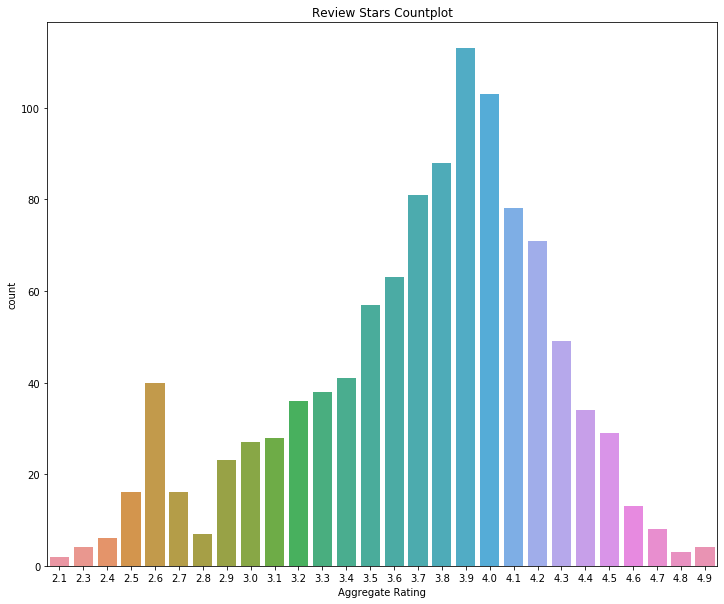

In [45]:
import seaborn as sns
fig, ax = plt.subplots(figsize=(12,10))
sns.countplot(df2['Aggregate Rating'], ax=ax)
plt.title('Review Stars Countplot')
#plt.savefig('stars.png')
plt.show()

####  **Second** >>> we will check **Aggregate Rating** & **Top 20 Resturants** are showing their result in the *BAR_Char*

In [46]:
top_restaurants = df2.sort_values(by=['Votes', 'Aggregate Rating'], ascending=False)[:20]
top_restaurants.head(20)

,Restaurant_ID,Name,Type,Address,Locality,Latitude,Longitude,Locality_verbose,Cuisines,Aggregate Rating,Votes
83,111826,Yanki Sizzlers,['Casual Dining'],"4, Ground Floor, Binori Ambit, Next to Renault...",Thaltej,23.053069,72.518100,"Thaltej, Ahmedabad","Continental, Italian, Chinese",4.9,3610
15,110237,Kabir Restaurant,['Casual Dining'],"JB Tower, Opposite Doordarshan Kendra, Drive I...",Gurukul,23.048427,72.523924,"Gurukul, Ahmedabad",North Indian,4.0,3052
44,18173173,Food On Way,[],"Shop 18, First Floor, Dev Aurum Building, Near...",Satellite,23.011694,72.513010,"Satellite, Ahmedabad","North Indian, Chinese",3.9,2776
10,18438909,La Pino'z Pizza,['Quick Bites'],"Shop 10, Circle B, Nyay Marg, Bodakdev, Ahmed...",Bodakdev,23.038035,72.512474,"Bodakdev, Ahmedabad","Pizza, Italian",4.5,2476
21,18143128,Mocha,['Café'],"6-9, Ground Floor, Devashish Business Park, Op...",Bodakdev,23.031820,72.511346,"Bodakdev, Ahmedabad","Cafe, Italian",4.6,2379
48,110026,Barbeque Nation,['Casual Dining'],"1st Floor, Satyaone, Opposite Manav Mandir, Me...",Memnagar,23.047823,72.526818,"Memnagar, Ahmedabad","Mughlai, North Indian, BBQ",4.5,2278
152,111895,650 - The Global Kitchen,['Casual Dining'],"Shreekunj Mandapam, Beside Golden Tulip Bunglo...",Ambavadi,23.010642,72.537492,"Ambavadi, Ahmedabad","North Indian, Italian, Continental",4.4,2196
118,110502,Patang - The Revolving Restaurant,['Casual Dining'],"Chinubhai Tower, Nehru Bridge Corner, Ashram R...",Ashram Road,23.025938,72.572250,"Ashram Road, Ahmedabad","North Indian, Chinese, Continental",3.9,1988
71,110990,Jassi De Parathe,['Casual Dining'],"107, Safal Pegasus, Anand Nagar Road, Prahlad ...","Safal Pegasus, Prahlad Nagar",23.012160,72.510830,"Safal Pegasus, Prahlad Nagar, Ahmedabad",North Indian,4.5,1949
29,113234,Shree Annpurna,['Quick Bites'],"A 2, Once More Apartment, Krishnabaug Cross Ro...",Mani Nagar,22.997773,72.603950,"Mani Nagar, Ahmedabad","North Indian, Chinese",4.1,1909


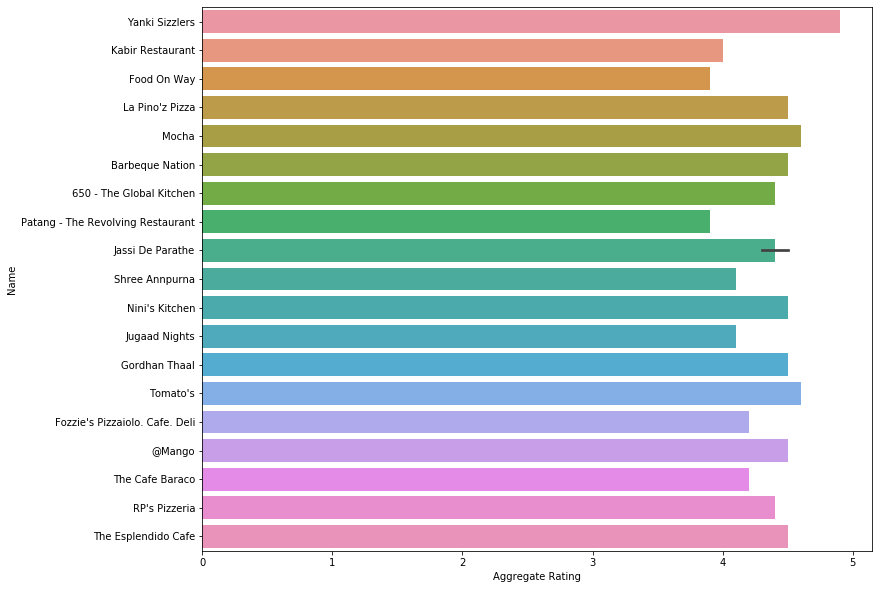

In [47]:
fig, ax = plt.subplots(figsize=(12,10))
sns.barplot(x = 'Aggregate Rating', y = 'Name', data=top_restaurants, ax= ax);
#plt.savefig('top20_restaurants.png')
plt.show()

#### **Third** >>> We will check witch are **The highest Rated Resturant in top 10 locality** for Ahmedabad City

NameError: name 'Locality_verbose' is not defined

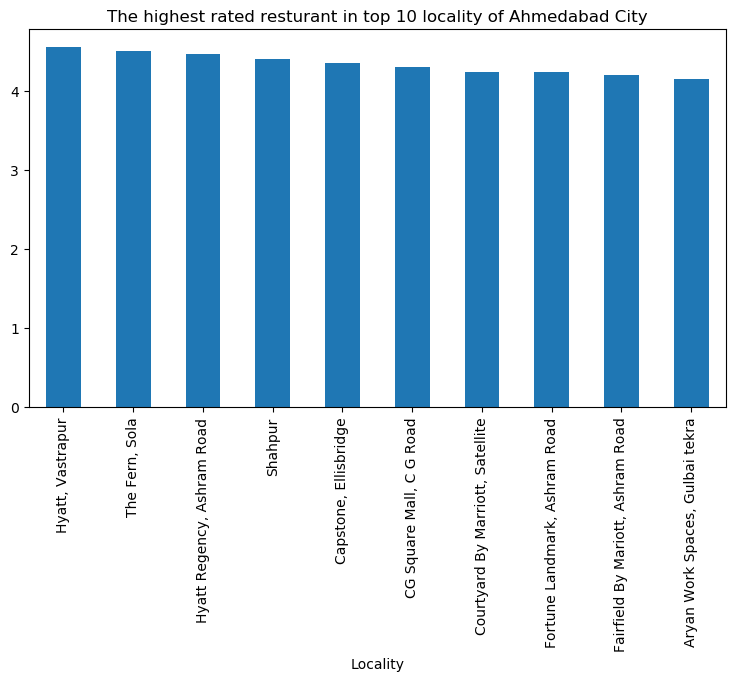

In [48]:
plt.figure(figsize=(9,5), dpi = 100)
# title
plt.title('The highest rated resturant in top 10 locality of Ahmedabad City')
#On x-axis

#giving a bar plot
df2.groupby('Locality')['Aggregate Rating'].mean().nlargest(10).plot(kind='bar')  

Locality_verbose

plt.xlabel('Resturant Locality in Ahmedabad')
#On y-axis
plt.ylabel('Aggregate Rating')
#displays the plot
plt.show()

Higest Rated : Resturant Name is : **Hyatt**  , witch is located in Vastrapur is 

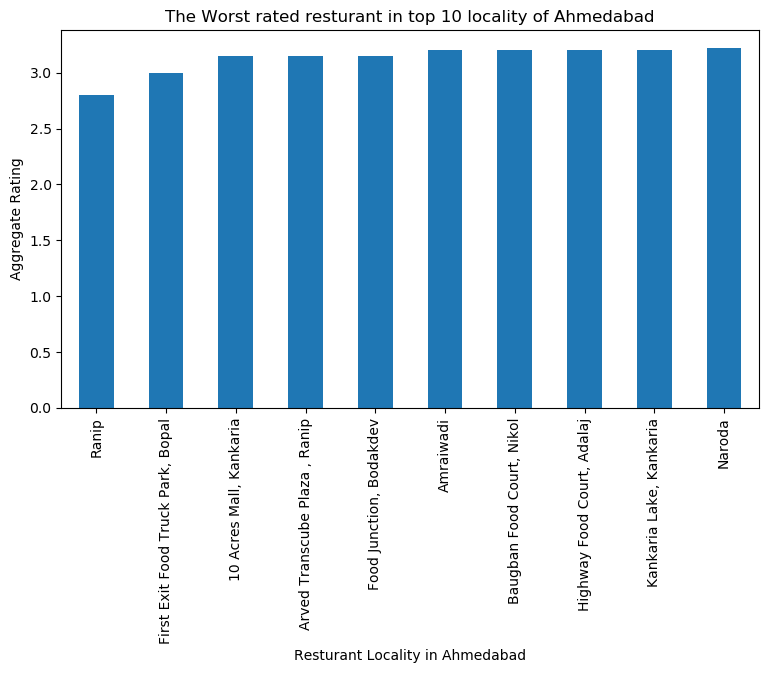

In [49]:
import matplotlib.pyplot as plt
plt.figure(figsize=(9,5), dpi = 100)
# title
plt.title('The Worst rated resturant in top 10 locality of Ahmedabad')
#On x-axis

#giving a bar plot

df2.groupby('Locality')['Aggregate Rating'].mean().nsmallest(10).plot(kind='bar')

plt.xlabel('Resturant Locality in Ahmedabad')
#On y-axis
plt.ylabel('Aggregate Rating')

#displays the plot
plt.show()

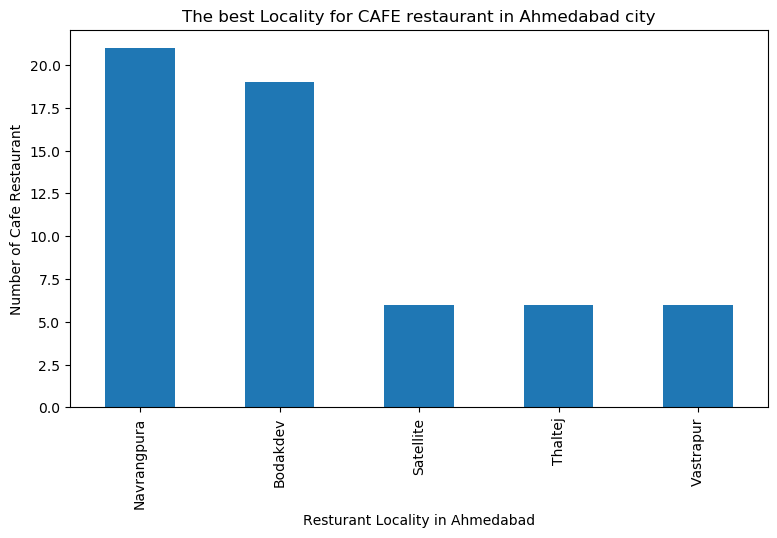

In [144]:
import matplotlib.pyplot as plt
plt.figure(figsize=(9,5), dpi = 100)
# title
plt.title('The best Locality for CAFE restaurant in Ahmedabad city')
#On x-axis

#giving a bar plot
df2[df2['Cuisines'].str.startswith('Cafe')].groupby('Locality')['Name'].count().nlargest(5).plot(kind='bar')

plt.xlabel('Resturant Locality in Ahmedabad')
#On y-axis
plt.ylabel('Number of Cafe Restaurant')

#displays the plot
plt.show()

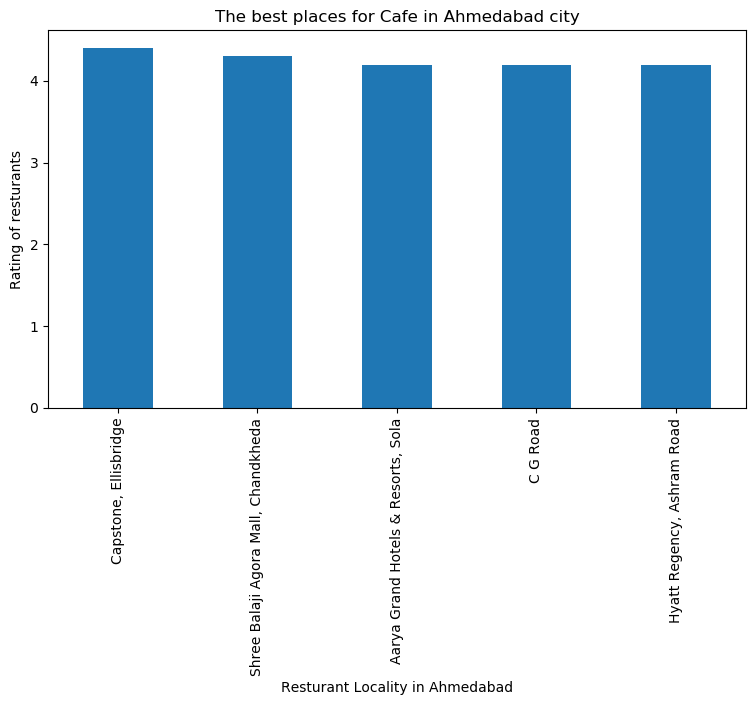

In [145]:
import matplotlib.pyplot as plt
plt.figure(figsize=(9,5), dpi = 100)
# title
plt.title('The best places for Cafe in Ahmedabad city')
#On x-axis

#giving a bar plot
df2[df2['Cuisines'].str.startswith('Cafe')].groupby('Locality')['Aggregate Rating'].mean().nlargest(5).plot(kind='bar')

plt.xlabel('Resturant Locality in Ahmedabad')
#On y-axis
plt.ylabel('Rating of resturants')

#displays the plot
plt.show()

###  KMean

In [56]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

df3=df2
# Elbow method to determine the number of K in Kmeans Clustering
coords = df3[['Longitude','Latitude']]

distortions = []
K = range(1,15)
for k in K:
    kmeansModel = KMeans(n_clusters=k)
    kmeansModel = kmeansModel.fit(coords)
    distortions.append(kmeansModel.inertia_)

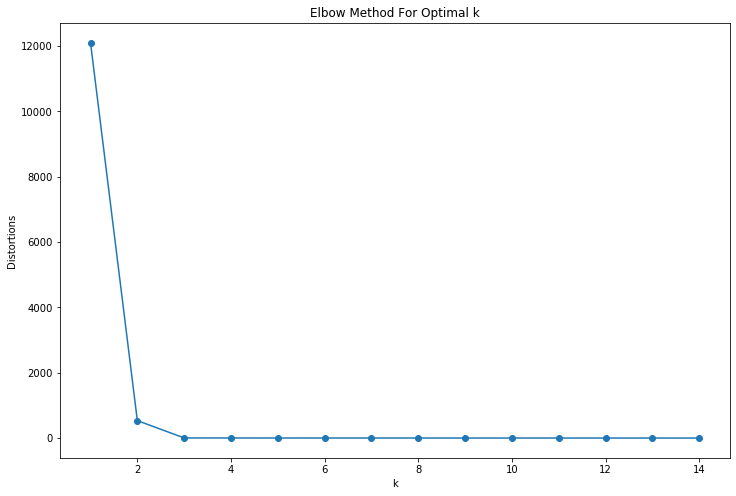

In [57]:
fig, ax = plt.subplots(figsize=(12, 8))
plt.plot(K, distortions, marker='o')
plt.xlabel('k')
plt.ylabel('Distortions')
plt.title('Elbow Method For Optimal k')
#plt.savefig('elbow.png')
plt.show()

In [66]:
from sklearn.metrics import silhouette_score

sil = []
kmax =15

# dissimilarity would not be defined for a single cluster, thus, minimum number of clusters should be 2
for k in range(2, kmax+1):
    kmeans = KMeans(n_clusters = k).fit(coords)
    labels = kmeans.labels_
    sil.append(silhouette_score(coords, labels, metric = 'euclidean'))

In [67]:
sil

[0.9986245988243221,
 0.9964272632890111,
 0.48291120005977256,
 0.45819387321670896,
 0.4116555792944538,
 0.41293643482248865,
 0.4197728941558701,
 0.4355967243681991,
 0.4109769060503008,
 0.4380633561451177,
 0.4411642994724721,
 0.4210698854705152,
 0.4126996602615737,
 0.439540476202946]

In [72]:
kmeans = KMeans(n_clusters=3, init='k-means++')
kmeans.fit(coords)
y = kmeans.labels_
print("k = 3", " silhouette_score ", silhouette_score(coords, y, metric='euclidean'))

k = 3  silhouette_score  0.9964272632890111


In [58]:
import folium

#import plotly 
#import plotly.offline as py
#import plotly.graph_objs as go
#import plotly_express as px

Ahmedabad_Rest = folium.Map(location=[23.05, 72.52], zoom_start=12)

X = df3['Latitude']
Y = df3['Longitude']
Z = np.stack((X, Y), axis=1)

kmeans = KMeans(n_clusters=5, random_state=0).fit(Z)

clusters = kmeans.labels_
colors = ['red', 'green', 'blue', 'yellow','orange']
df3 ['Cluster'] = clusters

for latitude, longitude, Locality, cluster in zip(df3['Latitude'], df3['Longitude'], df3['Locality'], df3['Cluster']):
    label = folium.Popup(Locality, parse_html=True)
    folium.CircleMarker(
        [latitude, longitude],
        radius=5,
        popup=label,
        color='black',
        fill=True,
        fill_color=colors[cluster],
        fill_opacity=0.7).add_to(Ahmedabad_Rest)  

Ahmedabad_Rest

#px.set_mapbox_access_token("pk.eyJ1Ijoic2hha2Fzb20iLCJhIjoiY2plMWg1NGFpMXZ5NjJxbjhlM2ttN3AwbiJ9.RtGYHmreKiyBfHuElgYq_w")
#configure_plotly_browser_state()
#px.scatter_mapbox(df_restaurants, lat="latitude", lon="longitude", color="Aggregate rating", size='Votes',size_max=30, zoom=3, width=1200, height=800)

In [71]:
df3.head()

,Restaurant_ID,Name,Type,Address,Locality,Latitude,Longitude,Locality_verbose,Cuisines,Aggregate Rating,Votes,Cluster
0,18757684,Ph Se Food,['Casual Dining'],"205-206, Silve Radiance, Sindhu Bhawan Road, P...",Bodakdev,23.038755,72.510887,"Bodakdev, Ahmedabad","North Indian, Chinese, Fast Food",4.5,1434,3
1,18658177,Millhouse,['Casual Dining'],"3rd Floor, Alpha One Mall, Vastrapur, Ahmedabad","Ahmedabad One Mall, Vastrapur",23.039770,72.531508,"Ahmedabad One Mall, Vastrapur, Ahmedabad","Continental, Italian",4.5,1530,3
2,18663856,The Red Bistro,['Casual Dining'],"Armeida, Sindhu Bhavan Road, Off SG Road, Boda...",Bodakdev,23.039852,72.509181,"Bodakdev, Ahmedabad","Mexican, Italian, North Indian",4.6,695,3
3,18819827,Kadak Bhagat,['Casual Dining'],"1, First Floor, Dev Aurum Complex, Deer Cirle,...",Prahlad Nagar,23.012411,72.514392,"Prahlad Nagar, Ahmedabad","North Indian, Chinese, Fast Food",4.4,977,3
4,18718880,Urban Khichdi,['Casual Dining'],"A -103, Shivalik Plaza, Opposite AMA, IIM Road...",Vastrapur,23.028315,72.542458,"Vastrapur, Ahmedabad","North Indian, Continental",4.7,619,0


### Data Transformation 
We are doing GROUPINP Based on **Locality** (grouping the data)

In [96]:
df3_Loc =  df3.groupby('Locality').count()['Name'].to_frame()

df3_Res_rating= df3.groupby('Locality')['Aggregate Rating'].mean().to_frame()

df3_Cuisines = df3.groupby(['Locality'])['Cuisines'].agg(', '.join).reset_index()

#df2_R = df2.groupby(['Locality'])['Rating text'].unique().agg(', '.join).reset_index()

df3_V = df3.groupby(['Locality'])['Votes'].sum().to_frame()

df3_Lat = df3.groupby('Locality').mean()['Latitude'].to_frame()

df3_Lng = df3.groupby('Locality').mean()['Longitude'].to_frame()

df3_final = pd.merge(df3_Lat,df3_Lng,on='Locality').merge(df3_Loc, on='Locality').merge(df3_Cuisines, on='Locality').merge(df3_Res_rating,on ='Locality').merge(df3_V, on ='Locality')

In [99]:
print("size :",df3_final.shape)
df3_final

size : (108, 7)


,Locality,Latitude,Longitude,Name,Cuisines,Aggregate Rating,Votes
0,"Sigma Legacy Building, Vastrapur",23.027271,72.544209,2,"North Indian, BBQ, Desserts, Bakery",3.900000,979
1,"10 Acres Mall, Kankaria",23.014879,72.596397,2,"Beverages, Cafe, Sandwich, Fast Food, Burger, ...",3.150000,432
2,"4D Square Mall, Chandkheda",23.102908,72.595708,9,"Pizza, Fast Food, Pizza, Fast Food, North Indi...",3.611111,4026
3,"Aarya Grand Hotels & Resorts, Sola",23.075418,72.522681,2,"North Indian, Cafe",3.950000,226
4,"Acropolis Mall, Thaltej",23.048584,72.516107,4,"North Indian, Mughlai, Continental, Desserts, ...",3.675000,835
...,...,...,...,...,...,...,...
103,Vatva,22.951602,72.662410,2,"North Indian, Chinese, Gujarati, Continental, ...",3.250000,97
104,Vejalpur,23.000044,72.519777,5,"Gujarati, Rajasthani, North Indian, Chinese, F...",3.320000,1378
105,"Venus Atlantis, Prahlad Nagar",23.011796,72.511691,5,"Pizza, Fast Food, Mithai, Fast Food, Street Fo...",3.520000,3380
106,"Vittal Mall, Chandkheda",23.106580,72.598164,2,"North Indian, Chinese, Bengali, North Indian",3.300000,367


### Define **FOURSQUARE** Credentials and Version

In [101]:
## Define Foursquare Credentials and Version
CLIENT_ID = 'PWWBE2WNRCNDMLFQAXUBS40HZCAPQT2AVPOLYEIDD44TBKK0' # your Foursquare ID
CLIENT_SECRET = 'MJUD1KWLY0KSF4MB5VYY4B2JF1TZFXQAIYUMHZKV5JCPFFYV' # your Foursquare Secret
VERSION = '20180604'     # Foursquare API version
LIMIT = 30

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: PWWBE2WNRCNDMLFQAXUBS40HZCAPQT2AVPOLYEIDD44TBKK0
CLIENT_SECRET:MJUD1KWLY0KSF4MB5VYY4B2JF1TZFXQAIYUMHZKV5JCPFFYV


#### Create a function to repeat the same process to all the Locality in Ahmedabad City

In [102]:
## create a function to repeat the same process to all the Locality in Ahmedabad City

def getNearbyVenues(names, latitudes, longitudes, radius=500,LIMIT = 100):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Locality', 
                  'Locality Latitude', 
                  'Locality Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)


In [107]:
import requests # library to handle requests

# find the venues in all New Delhi Locality
new_Ahmedabad_venues = getNearbyVenues(names=df3_final['Locality'],
                                   latitudes=df3_final['Latitude'],
                                   longitudes=df3_final['Longitude']
                                  )

 Sigma Legacy Building, Vastrapur
10 Acres Mall, Kankaria
4D Square Mall, Chandkheda
Aarya Grand Hotels & Resorts, Sola
Acropolis Mall, Thaltej
Adalaj
Ahmedabad Central Mall, Ambavadi
Ahmedabad One Mall, Vastrapur
Ahmedabad Streat Food Park, Prahlad Nagar
Ambavadi
Amraiwadi
Armoise Hotel, C G Road
Arved Transcube Plaza , Ranip
Aryan Work Spaces, Gulbai tekra
Ashram Road
Astodia
Bapunagar
Baugban Food Court, Nikol
Bhadra
Bodakdev
Bopal
C G Road
CG Square Mall, C G Road
Cama Hotel, Bhadra
Camps Corner 2, Prahlad Nagar
Capstone, Ellisbridge
Chandkheda
Chandlodia
Country Inn & Suites, Thaltej
Courtyard By Marriott, Satellite
Crowne Plaza, Satellite
Double Tree By Hilton, Bopal
Ellis Bridge
Fairfield By Mariott, Ashram Road
First Exit Food Truck Park, Bopal
Food Junction, Bodakdev
Food Truck Park
Fortune Landmark, Ashram Road
Fun Food Battalian, Bopal
Ghatlodia
Gota
Gulbai Tekra
Gulmohar Park, Satellite
Gurukul
Hansol
Highway Food Court, Adalaj
Himalaya Mall, Gurukul
Hotel Aloft, Sola
Hotel

In [113]:
print("Size of New Venues :",new_Ahmedabad_venues.shape)
new_Ahmedabad_venues.head()

Size of New Venues : (942, 7)


,Locality,Locality Latitude,Locality Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,"Sigma Legacy Building, Vastrapur",23.027271,72.544209,Mint Route,23.027645,72.544113,Vegetarian / Vegan Restaurant
1,"Sigma Legacy Building, Vastrapur",23.027271,72.544209,Birmies,23.027362,72.544465,Indian Restaurant
2,"Sigma Legacy Building, Vastrapur",23.027271,72.544209,Dangee Dums,23.027597,72.544235,Dessert Shop
3,"Sigma Legacy Building, Vastrapur",23.027271,72.544209,Subway,23.028550,72.542598,Sandwich Place
4,"Sigma Legacy Building, Vastrapur",23.027271,72.544209,SandwichworkZ,23.028640,72.542761,Café


In [114]:
new_Ahmedabad_venues.groupby('Locality').count()

,Locality Latitude,Locality Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Locality,,,,,,
"Sigma Legacy Building, Vastrapur",19,19,19,19,19,19
"10 Acres Mall, Kankaria",7,7,7,7,7,7
"4D Square Mall, Chandkheda",8,8,8,8,8,8
"Aarya Grand Hotels & Resorts, Sola",5,5,5,5,5,5
"Acropolis Mall, Thaltej",11,11,11,11,11,11
...,...,...,...,...,...,...
Vastrapur,25,25,25,25,25,25
Vejalpur,2,2,2,2,2,2
"Venus Atlantis, Prahlad Nagar",23,23,23,23,23,23


In [115]:
print('There are {} uniques categories.'.format(len(new_Ahmedabad_venues['Venue Category'].unique())))

There are 97 uniques categories.


In [116]:
## Analyze Each Locality

# one hot encoding
new_Ahmedabad_onehot = pd.get_dummies(new_Ahmedabad_venues[['Venue Category']], prefix="", prefix_sep="")

# add Locality column back to dataframe
new_Ahmedabad_onehot['Locality'] = new_Ahmedabad_venues['Locality'] 

# move Locality column to the first column
column_list = new_Ahmedabad_onehot.columns.tolist()
column_number = int(column_list.index('Locality'))
column_list = [column_list[column_number]] + column_list[:column_number] + column_list[column_number+1:]
new_Ahmedabad_onehot = new_Ahmedabad_onehot[column_list]

new_Ahmedabad_onehot.head()

,Locality,ATM,American Restaurant,Arcade,Art Gallery,Arts & Crafts Store,Asian Restaurant,BBQ Joint,Bakery,Boat or Ferry,...,Supermarket,Tea Room,Tennis Court,Theater,Toy / Game Store,Vegetarian / Vegan Restaurant,Video Store,Women's Store,Yoga Studio,Zoo
0,"Sigma Legacy Building, Vastrapur",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,"Sigma Legacy Building, Vastrapur",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,"Sigma Legacy Building, Vastrapur",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,"Sigma Legacy Building, Vastrapur",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,"Sigma Legacy Building, Vastrapur",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [122]:
Ahmedabad_grouped = new_Ahmedabad_onehot.groupby('Locality').mean().reset_index()

print("Shape or Size :",Ahmedabad_grouped.shape)
Ahmedabad_grouped.head()

Shape or Size : (101, 98)


,Locality,ATM,American Restaurant,Arcade,Art Gallery,Arts & Crafts Store,Asian Restaurant,BBQ Joint,Bakery,Boat or Ferry,...,Supermarket,Tea Room,Tennis Court,Theater,Toy / Game Store,Vegetarian / Vegan Restaurant,Video Store,Women's Store,Yoga Studio,Zoo
0,"Sigma Legacy Building, Vastrapur",0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.105263,0.0,...,0.0,0.052632,0.0,0.0,0.0,0.052632,0.0,0.0,0.0,0.0
1,"10 Acres Mall, Kankaria",0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
2,"4D Square Mall, Chandkheda",0.0,0.0,0.125,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
3,"Aarya Grand Hotels & Resorts, Sola",0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
4,"Acropolis Mall, Thaltej",0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0


In [123]:
## print each Locality along with the top 5 most common venues

num_top_venues = 5

for hood in Ahmedabad_grouped['Locality']:
    print("----"+hood+"----")
    temp = Ahmedabad_grouped[Ahmedabad_grouped['Locality'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

---- Sigma Legacy Building, Vastrapur----
               venue  freq
0               Café  0.26
1  Indian Restaurant  0.11
2             Bakery  0.11
3           Tea Room  0.05
4        Pizza Place  0.05


----10 Acres Mall, Kankaria----
                  venue  freq
0             Multiplex  0.29
1         Shopping Mall  0.29
2        Clothing Store  0.14
3  Fast Food Restaurant  0.14
4           Bus Station  0.14


----4D Square Mall, Chandkheda----
            venue  freq
0       Multiplex  0.12
1          Arcade  0.12
2     Pizza Place  0.12
3  Sandwich Place  0.12
4     Coffee Shop  0.12


----Aarya Grand Hotels & Resorts, Sola----
               venue  freq
0              Hotel   0.6
1        Snack Place   0.2
2               Pool   0.2
3  Indian Restaurant   0.0
4          Multiplex   0.0


----Acropolis Mall, Thaltej----
                  venue  freq
0     Indian Restaurant  0.18
1        Ice Cream Shop  0.09
2             Multiplex  0.09
3  Gym / Fitness Center  0.09
4        S

In [124]:
## put that into a pandas dataframe
## First, write a function to sort the venues in descending order.

def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [125]:
## create the new dataframe and display the top 10 venues for each Locality.

num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Locality']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
Locality_venues_sorted = pd.DataFrame(columns=columns)
Locality_venues_sorted['Locality'] = Ahmedabad_grouped['Locality']

for ind in np.arange(Ahmedabad_grouped.shape[0]):
    Locality_venues_sorted.iloc[ind, 1:] = return_most_common_venues(Ahmedabad_grouped.iloc[ind, :], num_top_venues)

Locality_venues_sorted

,Locality,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,"Sigma Legacy Building, Vastrapur",Café,Indian Restaurant,Bakery,Pizza Place,Sandwich Place,Breakfast Spot,Restaurant,Tea Room,Mexican Restaurant,Vegetarian / Vegan Restaurant
1,"10 Acres Mall, Kankaria",Multiplex,Shopping Mall,Fast Food Restaurant,Clothing Store,Bus Station,Zoo,Dessert Shop,Diner,Donut Shop,Electronics Store
2,"4D Square Mall, Chandkheda",Snack Place,Pizza Place,Arcade,North Indian Restaurant,Coffee Shop,Multiplex,Sandwich Place,Café,Zoo,Diner
3,"Aarya Grand Hotels & Resorts, Sola",Hotel,Snack Place,Pool,Fast Food Restaurant,Dance Studio,Department Store,Dessert Shop,Diner,Donut Shop,Electronics Store
4,"Acropolis Mall, Thaltej",Indian Restaurant,Gym / Fitness Center,Multiplex,Sandwich Place,Café,Shopping Mall,Snack Place,Mediterranean Restaurant,Ice Cream Shop,Furniture / Home Store
...,...,...,...,...,...,...,...,...,...,...,...
96,Vastrapur,Clothing Store,Pizza Place,Indian Restaurant,Fast Food Restaurant,Café,Shopping Mall,Snack Place,Food Court,Donut Shop,Men's Store
97,Vejalpur,ATM,Pool Hall,American Restaurant,Food & Drink Shop,Dessert Shop,Diner,Donut Shop,Electronics Store,Event Space,Falafel Restaurant
98,"Venus Atlantis, Prahlad Nagar",Café,Vegetarian / Vegan Restaurant,Indian Restaurant,BBQ Joint,Coffee Shop,Restaurant,Hotel,Gas Station,Yoga Studio,Ice Cream Shop
99,"Vittal Mall, Chandkheda",Pizza Place,Coffee Shop,North Indian Restaurant,Multiplex,Sandwich Place,Café,Snack Place,Zoo,Dance Studio,Dessert Shop


In [133]:
## Cluster Locality
## Run k-means to cluster the Locality into 5 clusters.

# set number of clusters
kclusters = 5

Ahmedabad_clustering = Ahmedabad_grouped.drop('Locality', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(Ahmedabad_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 
kmeans.labels_.shape

(101,)

In [134]:
# add clustering labels
Ahmedabad_merged = df3_final.head(101)
Ahmedabad_merged['Cluster Labels'] = kmeans.labels_

# merge New_Delhi_grouped with df_Chinese to add latitude/longitude for each Locality
Ahmedabad_merged = Ahmedabad_merged.join(Locality_venues_sorted.set_index('Locality'), on='Locality')

Ahmedabad_merged.head()

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Locality,Latitude,Longitude,Name,Cuisines,Aggregate Rating,Votes,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,"Sigma Legacy Building, Vastrapur",23.027271,72.544209,2,"North Indian, BBQ, Desserts, Bakery",3.900000,979,0,Café,Indian Restaurant,Bakery,Pizza Place,Sandwich Place,Breakfast Spot,Restaurant,Tea Room,Mexican Restaurant,Vegetarian / Vegan Restaurant
1,"10 Acres Mall, Kankaria",23.014879,72.596397,2,"Beverages, Cafe, Sandwich, Fast Food, Burger, ...",3.150000,432,0,Multiplex,Shopping Mall,Fast Food Restaurant,Clothing Store,Bus Station,Zoo,Dessert Shop,Diner,Donut Shop,Electronics Store
2,"4D Square Mall, Chandkheda",23.102908,72.595708,9,"Pizza, Fast Food, Pizza, Fast Food, North Indi...",3.611111,4026,0,Snack Place,Pizza Place,Arcade,North Indian Restaurant,Coffee Shop,Multiplex,Sandwich Place,Café,Zoo,Diner
3,"Aarya Grand Hotels & Resorts, Sola",23.075418,72.522681,2,"North Indian, Cafe",3.950000,226,3,Hotel,Snack Place,Pool,Fast Food Restaurant,Dance Studio,Department Store,Dessert Shop,Diner,Donut Shop,Electronics Store
4,"Acropolis Mall, Thaltej",23.048584,72.516107,4,"North Indian, Mughlai, Continental, Desserts, ...",3.675000,835,0,Indian Restaurant,Gym / Fitness Center,Multiplex,Sandwich Place,Café,Shopping Mall,Snack Place,Mediterranean Restaurant,Ice Cream Shop,Furniture / Home Store


In [136]:
# create final map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=10)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i+x+(i*x)**2 for i in range(kclusters)]
#colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
#rainbow = [colors.rgb2hex(i) for i in colors_array]
colors = ['red', 'green', 'blue', 'yellow','orange']

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(Ahmedabad_merged['Latitude'], Ahmedabad_merged['Longitude'], Ahmedabad_merged['Locality'], Ahmedabad_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color='black',
        fill=True,
        fill_color=colors[cluster],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

In [138]:
## Examine Clusters

## Cluster 1
Ahmedabad_merged.loc[Ahmedabad_merged['Cluster Labels'] == 0, Ahmedabad_merged.columns[[1] + list(range(3, Ahmedabad_merged.shape[1]))]]

,Latitude,Name,Cuisines,Aggregate Rating,Votes,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,23.027271,2,"North Indian, BBQ, Desserts, Bakery",3.900000,979,0,Café,Indian Restaurant,Bakery,Pizza Place,Sandwich Place,Breakfast Spot,Restaurant,Tea Room,Mexican Restaurant,Vegetarian / Vegan Restaurant
1,23.014879,2,"Beverages, Cafe, Sandwich, Fast Food, Burger, ...",3.150000,432,0,Multiplex,Shopping Mall,Fast Food Restaurant,Clothing Store,Bus Station,Zoo,Dessert Shop,Diner,Donut Shop,Electronics Store
2,23.102908,9,"Pizza, Fast Food, Pizza, Fast Food, North Indi...",3.611111,4026,0,Snack Place,Pizza Place,Arcade,North Indian Restaurant,Coffee Shop,Multiplex,Sandwich Place,Café,Zoo,Diner
4,23.048584,4,"North Indian, Mughlai, Continental, Desserts, ...",3.675000,835,0,Indian Restaurant,Gym / Fitness Center,Multiplex,Sandwich Place,Café,Shopping Mall,Snack Place,Mediterranean Restaurant,Ice Cream Shop,Furniture / Home Store
5,23.150153,10,"Street Food, North Indian, Chinese, Fast Food,...",3.360000,882,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93,23.078676,2,"North Indian, Continental, Gujarati, North Ind...",4.100000,364,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
96,23.037781,1,"Cafe, Bakery, Desserts, North Indian",3.600000,251,0,Indian Restaurant,Café,Ice Cream Shop,Hotel,Smoke Shop,Gym / Fitness Center,Fast Food Restaurant,Lounge,Mexican Restaurant,Donut Shop
98,23.166161,1,"Mexican, Chinese, Italian, Thai",4.100000,932,0,Diner,Chinese Restaurant,Zoo,Dance Studio,Dessert Shop,Donut Shop,Electronics Store,Event Space,Falafel Restaurant,Farmers Market
99,23.058523,11,"Beverages, Desserts, North Indian, Fast Food, ...",3.581818,557,0,Hotel Bar,Coffee Shop,Ice Cream Shop,Indian Restaurant,Diner,Street Food Gathering,Zoo,Flea Market,Dessert Shop,Donut Shop


In [140]:
## Examine Clusters

## Cluster 2

Ahmedabad_merged.loc[Ahmedabad_merged['Cluster Labels'] == 1, Ahmedabad_merged.columns[[1] + list(range(3, Ahmedabad_merged.shape[1]))]]

,Latitude,Name,Cuisines,Aggregate Rating,Votes,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
10,22.991732,1,Gujarati,3.20,13,1,Café,Zoo,Dance Studio,Dessert Shop,Diner,Donut Shop,Electronics Store,Event Space,Falafel Restaurant,Farmers Market
13,23.033316,2,"Fast Food, Sandwich, Cafe, Tea",4.15,1432,1,Snack Place,Café,Indian Restaurant,Tea Room,Italian Restaurant,Arcade,Pizza Place,Asian Restaurant,Coffee Shop,Clothing Store
42,23.026687,4,"Chinese, Asian, Sushi, Japanese, Thai, North I...",3.45,1793,1,Multiplex,Hotel,Indian Restaurant,Coffee Shop,Pizza Place,Shopping Mall,Gym / Fitness Center,Italian Restaurant,American Restaurant,Noodle House
94,23.042470,2,"North Indian, Continental, Cafe, North Indian,...",4.10,1464,1,Coffee Shop,Indian Restaurant,Hotel,Café,Ice Cream Shop,Fast Food Restaurant,Mexican Restaurant,Donut Shop,Dessert Shop,Pool
95,23.065286,1,"North Indian, Chinese, Continental",3.70,271,1,Pizza Place,Snack Place,Vegetarian / Vegan Restaurant,Hotel Bar,Indian Restaurant,Fast Food Restaurant,Dance Studio,Department Store,Dessert Shop,Diner


In [142]:
## Examine Clusters

## Cluster 3

Ahmedabad_merged.loc[Ahmedabad_merged['Cluster Labels'] == 2, Ahmedabad_merged.columns[[1] + list(range(3, Ahmedabad_merged.shape[1]))]]

,Latitude,Name,Cuisines,Aggregate Rating,Votes,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
25,23.019937,2,"Pizza, Italian, Cafe, Tea",4.350000,1104,2,Fast Food Restaurant,Coffee Shop,Park,Indian Restaurant,Pizza Place,Zoo,Dessert Shop,Diner,Donut Shop,Electronics Store
66,23.025218,4,"Desserts, Ice Cream, Mithai, Chinese, North In...",3.575000,556,2,IT Services,Business Service,Zoo,Food & Drink Shop,Dessert Shop,Diner,Donut Shop,Electronics Store,Event Space,Falafel Restaurant
68,23.004792,2,"Cafe, North Indian, Chinese",3.900000,467,2,Hotel,Sandwich Place,Bakery,Coffee Shop,Diner,Fast Food Restaurant,Ice Cream Shop,Pizza Place,ATM,Supermarket
77,23.042149,24,"Beverages, Ice Cream, Desserts, Desserts, Fast...",3.454167,780,2,Fast Food Restaurant,Restaurant,Food Court,Movie Theater,Zoo,Department Store,Dessert Shop,Diner,Donut Shop,Electronics Store
97,23.040254,1,"Gujarati, Rajasthani",4.000000,403,2,Restaurant,Café,Coffee Shop,Tea Room,Comfort Food Restaurant,General Entertainment,Falafel Restaurant,Department Store,Dessert Shop,Diner


### Conclusion <br>

Best Neighborhoods for **CAFE** : Navrangpura , Bodakdev , Satellite , Thaltej , Vastrapur <br>

Best **Cafe Resturant** :Capstone , Shree Balaji Agrora Mall , Aarya Grand Hotel , Hyatt  <br>

Best **Resturants** in Ahmedabad : Hyatt(Vastrapur) , The ferm(Sola) , Hyatt(Ashram Road) <br>

 **Cluster 1**: It is most recommended for *Cafe*. <br>
 **Cluster 2**: It is most recommended for *Indian Restaurants*. <br>   
 **Cluster 3**: It is most recommended for *Fast food*. <br>

In [ ]:
import numpy as np        # library to handle data in a vectorized manner

import pandas as pd       # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
        #The display.max_columns option controls the number of columns to be printed. It receives an int or None("None" print all the columns)

import json               # library to handle JSON files

!conda install -c conda-forge geopy --yes         # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim             # convert an address into latitude and longitude values

import requests                                   # library to handle requests
from pandas.io.json import json_normalize         # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

!conda install -c conda-forge folium=0.5.0 --yes    # uncomment this line if you haven't completed the Foursquare API lab
import folium                                       # map rendering library

print('Libraries imported.')

In [31]:
import requests # library to handle requests
import pandas as pd # library for data analsysis
import numpy as np # library to handle data in a vectorized manner
import random # library for random number generation
# from bs4 import BeautifulSoup # library for web scrapping  

!conda install -c conda-forge geocoder --yes
import geocoder

!conda install -c conda-forge geopy --yes 
from geopy.geocoders import Nominatim # module to convert an address into latitude and longitude values

# libraries for displaying images
from IPython.display import Image 
from IPython.core.display import HTML 
    
# tranforming json file into a pandas dataframe library
from pandas.io.json import json_normalize

#!conda install -c conda-forge folium=0.5.0 --yes
import folium # plotting library

print('Folium installed')
print('Libraries imported.')

Solving environment: done

## Package Plan ##

  environment location: /home/jupyterlab/conda/envs/python

  added / updated specs:
    - geocoder


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    brotlipy-0.7.0             |py36h8c4c3a4_1000         346 KB  conda-forge
    chardet-3.0.4              |py36h9f0ad1d_1006         188 KB  conda-forge
    click-7.1.2                |     pyh9f0ad1d_0          64 KB  conda-forge
    cryptography-2.9.2         |   py36h45558ae_0         613 KB  conda-forge
    future-0.18.2              |   py36h9f0ad1d_1         714 KB  conda-forge
    geocoder-1.38.1            |             py_1          53 KB  conda-forge
    pysocks-1.7.1              |   py36h9f0ad1d_1          27 KB  conda-forge
    ratelim-0.1.6              |             py_2           6 KB  conda-forge
    ------------------------------------------------------------
                  